## Regression in Python

A good didactic source for regression is:
https://realpython.com/linear-regression-in-python/

In [1]:
# Import packages.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set up some x values.
x = np.arange(0.0, 10.1, 0.5)  
                                # linspace is also very applicable
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [3]:
len(x)

21

In [4]:
y = 5.0 * x + 2.0
y

array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ,
       29.5, 32. , 34.5, 37. , 39.5, 42. , 44.5, 47. , 49.5, 52. ])

In [5]:
np.polyfit(x, y, 1)

array([5., 2.])

In [6]:
# Let's add error like what typically is the case in the real world:

# Create y - note numpy's element-wise operations. Takes each individual element in the x array and multiplies by 5 (in this case)
# Equation of a line: and add in the epsilon (error) via numpy normal distribution
y = 5.0 * x + 2.0 + np.random.normal(0.0, 1.0, len(x)) # Here, m is 5, and c is 2

In [7]:
y

array([ 2.46614217,  3.13092209,  7.8680431 , 10.15796874, 11.69248479,
       14.38049974, 17.12501058, 18.12820297, 23.94762133, 23.94812528,
       26.93190365, 31.07682708, 31.30403125, 34.50580065, 37.16890454,
       38.59971757, 42.18517394, 44.69155244, 45.87232192, 49.90486984,
       54.11346133])

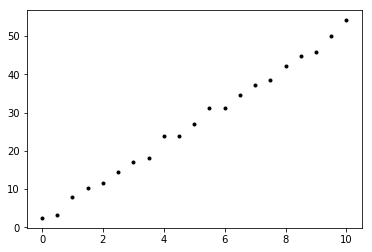

In [8]:
# Plot x versus y.
plt.plot(x, y, 'k.') # the third argument in plot takes the plotting point aesthetics

What would this line be if we didn't know the "equation of the line"?

In [9]:
# All you need is any 2 of theses points
# Let's look at a polynomial fit using NumPy

# Do regression on the x and y arrays using numpy. Least squares fitting.
np.polyfit(x, y, 1) # third argument is the deg argument?

# Thus, polyfit is telling us the best way to get y from x is for the first constant to by 5 and the second constant to be 2
# Best way to describe the relationship between x and y: It is saying if you take x, multiply it by 5 and add 2, you'll get the values for y  
# It essentially is reverse engneering

array([5.03483156, 1.93058432])

In [10]:
# Here it is proven:
np.polyfit(x[0:2], y[0:2], 1) # start at 0th element up to 2nd in each array

array([1.32955983, 2.46614217])

In [11]:
# Thus, if we just give polyfit only 2 pairs it will tell you 

***
$$ y = m x + c $$

m is the slope, c the y-intercept
***
But what about real world error? Model for my regression:

$$ y =  m x + c + \epsilon $$

epsilon$$\epsilon$$ 

is usually a random variable could be 0 or next could be 0.01 etc (tricky to measure). Epsilon represents **error** i.e. things we can't measure. It is the error in our measuring the relationship between x and y. Ideally we want 0 error. It exists in the real world. We never know the **m** and the **c** beforehand.

In [12]:
# Create a y with noise.
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))

In [13]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(3.0699953673045943, -1.7982939464093766)

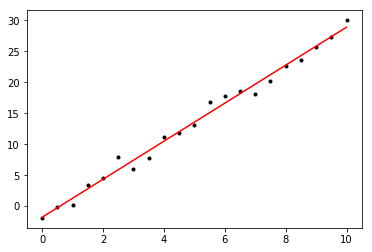

In [14]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

Note that we can easily calculate the best m and c ourselves.

In [15]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

# Now return to cell[30], notice they're the same outputs!

(3.0699953673045948, -1.7982939464093786)

<img src="https://i.ibb.co/SrwDdwk/regofline.png" alt="regofline" border="0">

In [16]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [17]:
y

array([  1.04277741,   3.50287823,   8.84674438,  14.29025831,
        20.53989548,  26.78692526,  34.64671882,  42.90211553,
        52.43512667,  62.72218125,  75.70551826,  89.67103625,
       101.92271893, 119.3925105 , 135.32317164, 151.42826523,
       169.94979547, 186.97372659, 206.81629078, 227.79586498,
       250.61807828])

In [18]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(24.8953186337994, -30.03313610971394)

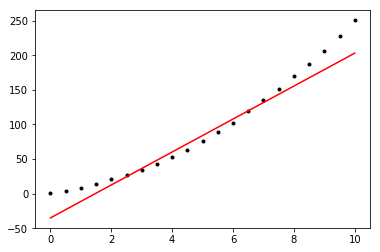

In [19]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, 23.82 * x - 35.106, 'r-')

Note how the points below the line are bunched in a specific 
x
range. HOWEVER, you do not want to extrapolate or generalise from this too much at all for obvious reasons.

### Multiple-linear regression

Try multi-linear regression using sklearn. https://scikit-learn.org/stable/

In [35]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm
import pandas as pd

In [36]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [37]:
# Read the iris csv from online.
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')

In [38]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


petalwidth=t(sepallength)+u(sepalwidth)+v(petallength)+c

In [39]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
# Essentially the 3 x variables to predict the y variable (petal width)
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [40]:
# Here's petal width.
y = df['petalwidth']

In [41]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Here's our intercept.
m.intercept_

-0.248723586024451

In [43]:
# Here's our coefficients, in order. One for each x variable
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [44]:
# See how good our fit is. R squared value essentially
m.score(x, y)

0.9380481344518986

In [45]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.9380481344518986

### Using statsmodels

Now compare this to the above

In [ ]:
#import numpy as np
import scipy
import sklearn
#from scipy import statsmodels
!pip install patsy
!conda install statsmodels
!conda install six

Solving environment: ...working... done

# All requested packages already installed.



In [48]:
# https://www.statsmodels.org/stable/index.html

# Using statsmodels.
import patsy
import numpy as np
import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.20e-88
Time:                        11:33:41   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      